# Fordgobike Trips in Feburary 2019 Dataset Exploration
## by (Omar Shoura)

## Investigation Overview

The goal is getting insights about the rush hours the user types and the peak days through the week.

## Dataset Overview

This dataset is provided by Fordgobike Trips in Feburary 2019 it has total 183412 records and it shows the users' type,gender,birth year, the stations, the trip duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('new_df.csv')
df.head()

,bike_id,start_station_id,end_station_id,start_station_name,end_station_name,start_time,end_time,start_month,start_day_of_week,start_hour,duration_min,user_type,bike_share_for_all_trip,member_age,member_gender
0,4902,21.0,13.0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,February,Thursday,17,869,Customer,No,35,Male
1,5905,86.0,3.0,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,February,Thursday,12,1030,Customer,No,47,Male
2,6638,375.0,70.0,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,February,Thursday,17,608,Subscriber,No,30,Other
3,4898,7.0,222.0,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,February,Thursday,23,26,Subscriber,Yes,45,Male
4,5200,93.0,323.0,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,February,Thursday,23,29,Subscriber,No,60,Male


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

Here we saw the top start and end stations the top two sations are the same in each case

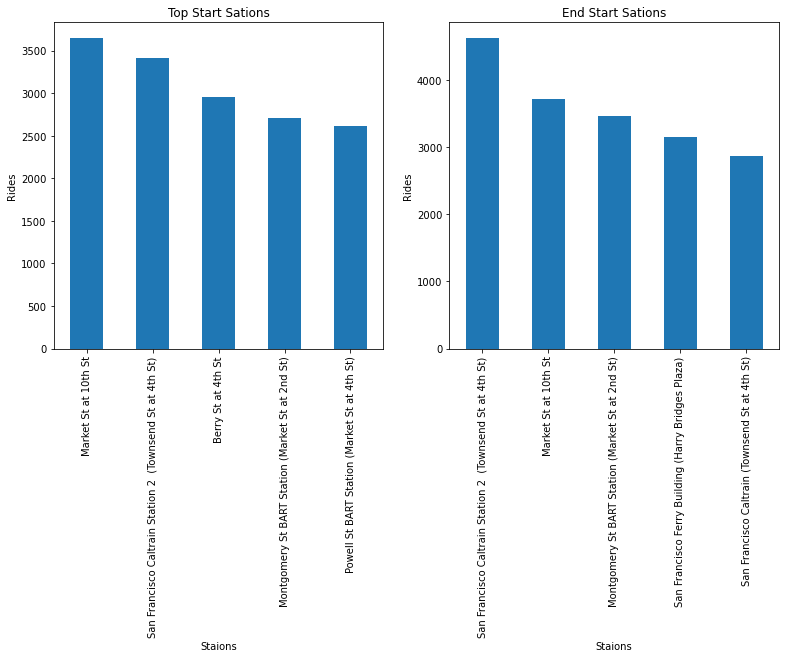

In [3]:
# getting the top start and end staions with trip counts
fig=plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
tp_strt_st=df.start_station_name.value_counts()[:5]
tp_strt_st.plot(kind='bar')
plt.xlabel('Staions')
plt.title('Top Start Sations')
plt.ylabel('Rides')

plt.subplot(1,2,2)
tp_end_st=df.end_station_name.value_counts()[:5]
tp_end_st.plot(kind='bar')
plt.xlabel('Staions')
plt.ylabel('Rides')
plt.title('End Start Sations');

## (Visualization 2)
The rush hours are at 8 Am and 5 PM

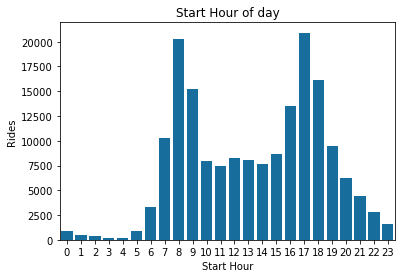

In [4]:
base_color=sb.color_palette('colorblind')[0]
sb.countplot(data=df,x='start_hour',color=base_color)
plt.title('Start Hour of day')
plt.xlabel('Start Hour')
plt.ylabel('Rides');

## (Visualization 3)

This plot showed the distribution for all members (Subcribers and Customers) during the week and the peaks for subscribers are on Thursday and Tuesday and it shows that customers peak is on Thursday.

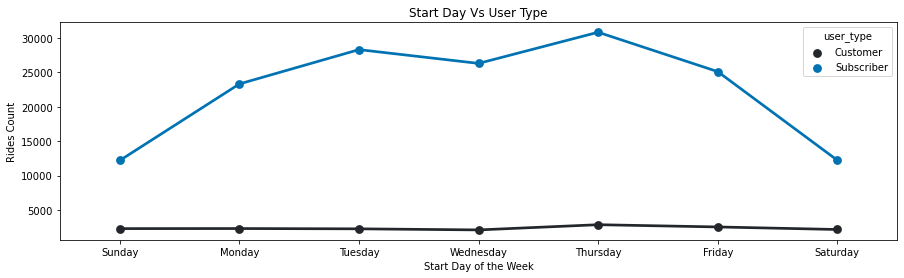

In [6]:
week_days=['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=[15,4])
strt_w_day_vs_usr_typ_df = df.groupby(['start_day_of_week', 'user_type']).size().reset_index()
g=sb.pointplot(data=strt_w_day_vs_usr_typ_df,hue='user_type',y=0,x='start_day_of_week',color=base_color,kind='count',order=week_days)
# g.fig.suptitle('Subscribers Vs Customers',y=1.05)
plt.title('Start Day Vs User Type')
plt.ylabel('Rides Count')
plt.xlabel('Start Day of the Week');

## (Visualization 4)

As we saw many times before the male subscribers are the most users and the peaks are during Thursday and Tuesday this confirms all the previous insights we got.

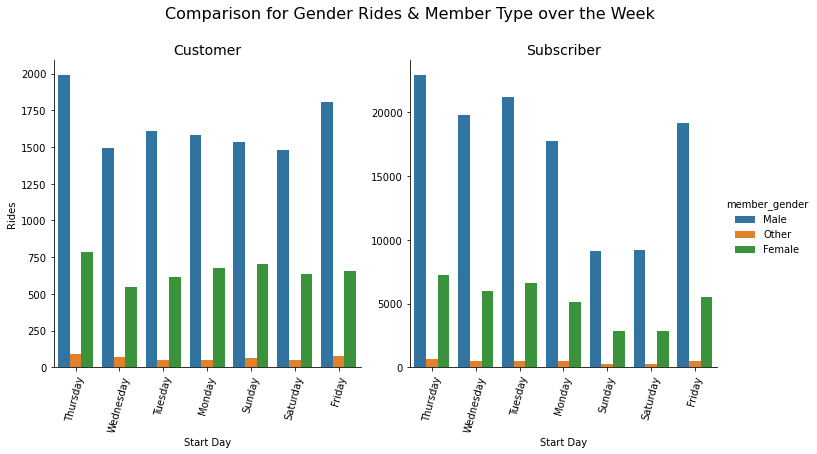

In [7]:
g=sb.catplot(data=df,hue='member_gender',x='start_day_of_week',col='user_type',kind='count',sharey=False)
g.set_xticklabels(rotation=75)
g.fig.suptitle('Comparison for Gender Rides & Member Type over the Week',y=1.08,fontsize=16)
g.set_titles('{col_name}',size=14)
g.set_axis_labels('Start Day','Rides');